# Descriptive & Visual Analytics

#### Perform data pre-processing needed to address data quality issues Oct 18 th , Mon 30% 4 Report Essential characteristics or descriptives of data Report any patterns in data that you find using Visual Analytics, clustering, etc. Emphasize on finding a novelty D3: Predictive AnalyticsPerform data pre-processing needed to address data quality issues Oct 18 th , Mon 30% 4 Report Essential characteristics or descriptives of data Report any patterns in data that you find using Visual Analytics, clustering, etc. Emphasize on finding a novelty D3: Predictive Analytics

In [1]:
import pandas as pd
import fastf1 as ff1
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# read csvs
qualLaps = pd.read_csv('all_qualLaps.csv')
qualResults = pd.read_csv('all_qualResults.csv')
qualStatus = pd.read_csv('all_qualStatus.csv')
qualTrackStatus = pd.read_csv('all_qualTrackStatus.csv')
qualWeather = pd.read_csv('all_qualWeather.csv')
raceLaps = pd.read_csv('all_raceLaps.csv')
raceResults = pd.read_csv('all_raceResults.csv')
raceStatus = pd.read_csv('all_raceStatus.csv')
raceTrackStatus = pd.read_csv('all_raceTrackStatus.csv')
raceWeather = pd.read_csv('all_raceWeather.csv')

C:\Users\alec\AppData\Local\Temp\ipykernel_13376\3672180663.py:13: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  raceLaps = pd.read_csv('all_raceLaps.csv')


## Qualifying (QualLaps) and Final Race Laps (raceLaps)

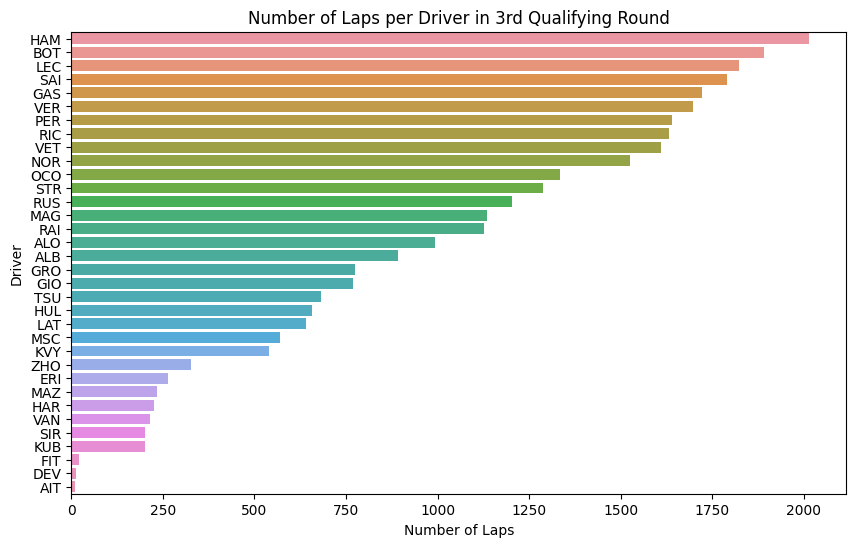

In [2]:
#Number of laps per Driver (Qualifying)
plt.figure(figsize=(10, 6))
sns.countplot(y=qualLaps['Driver'], order=qualLaps['Driver'].value_counts().index)
plt.title('Number of Laps per Driver in 3rd Qualifying Round',color='black')
plt.xlabel('Number of Laps')
plt.style.use('ggplot')

plt.show()

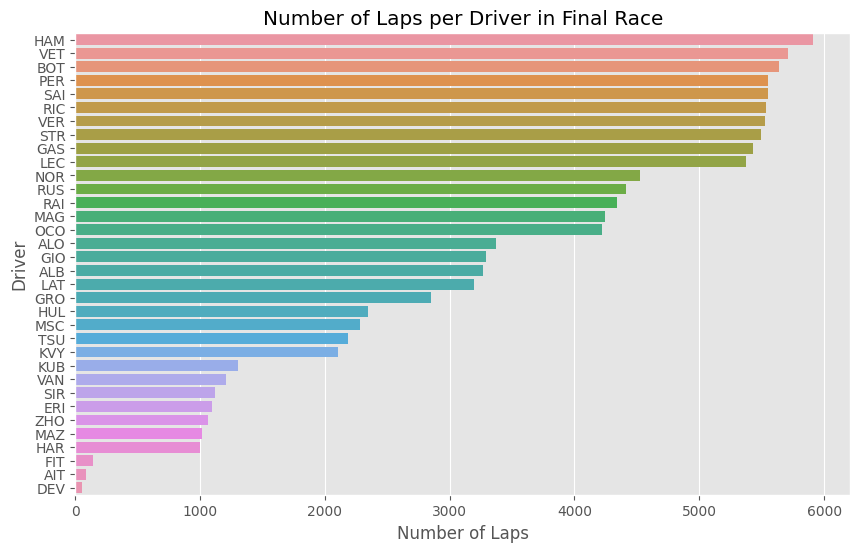

In [3]:
#Number of laps per Driver (Race)
plt.figure(figsize=(10, 6))
sns.countplot(y=raceLaps['Driver'], order=raceLaps['Driver'].value_counts().index)
plt.title('Number of Laps per Driver in Final Race',color='black')
plt.xlabel('Number of Laps')
plt.style.use('ggplot')

plt.show()

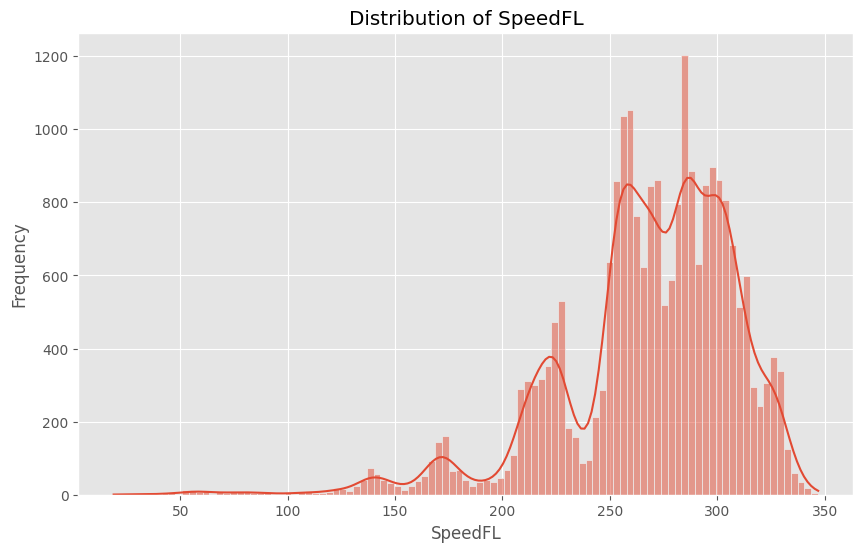

In [4]:
#Distribution of speeds (qualifying) 
# slower speed may indicate track curves
plt.figure(figsize=(10, 6))
sns.histplot(qualLaps['SpeedFL'].dropna(), kde=True)  
plt.title('Distribution of SpeedFL', color='black')
plt.xlabel('SpeedFL')
plt.ylabel('Frequency')
plt.style.use('ggplot')

plt.show()

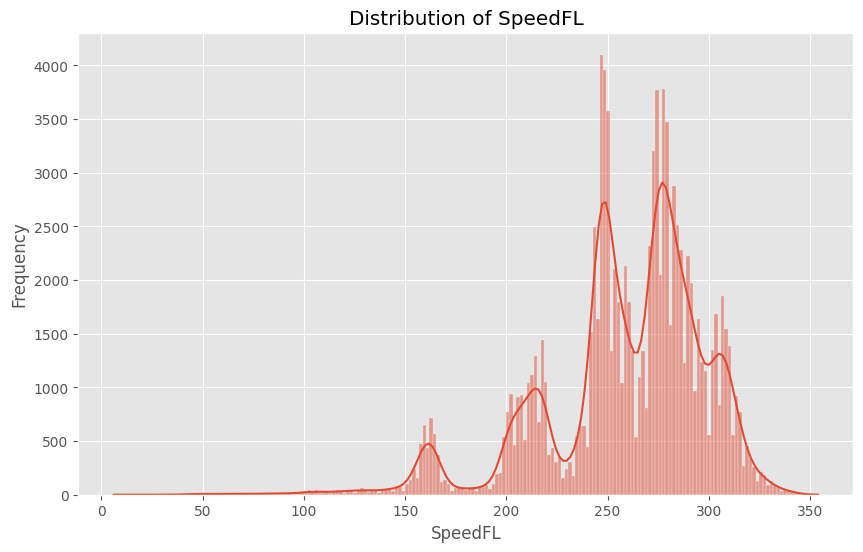

In [5]:
#Distribution of speeds (race)
plt.figure(figsize=(10, 6))
sns.histplot(raceLaps['SpeedFL'].dropna(), kde=True)
plt.title('Distribution of SpeedFL', color='black')
plt.xlabel('SpeedFL')
plt.ylabel('Frequency')
plt.style.use('ggplot')

plt.show()

C:\Users\alec\AppData\Local\Temp\ipykernel_13376\435794377.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Compound', y='SpeedFL', data=qualLaps, ci=None)


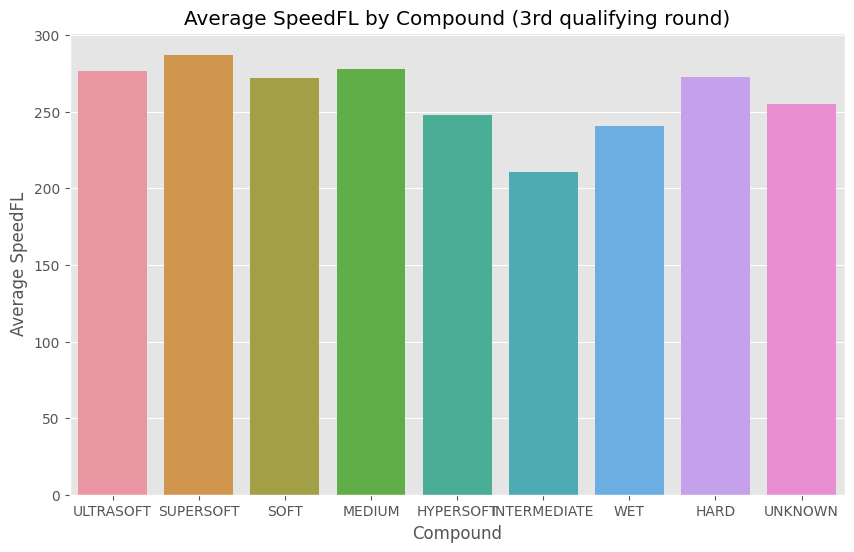

In [6]:
#Average SpeedFL by Compound (qualification)
plt.figure(figsize=(10, 6))
sns.barplot(x='Compound', y='SpeedFL', data=qualLaps, ci=None)
plt.title('Average SpeedFL by Compound (3rd qualifying round)',color='black')
plt.ylabel('Average SpeedFL')
plt.style.use('ggplot')

plt.show()

C:\Users\alec\AppData\Local\Temp\ipykernel_13376\3968635955.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Compound', y='SpeedFL', data=raceLaps, ci=None)


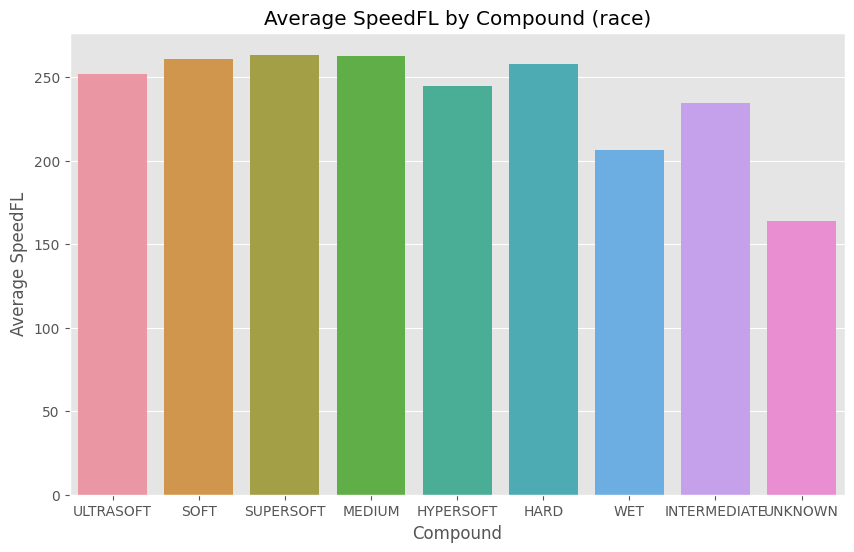

In [7]:
#Average SpeedFL by Compound (race)
plt.figure(figsize=(10, 6))
sns.barplot(x='Compound', y='SpeedFL', data=raceLaps, ci=None)
plt.title('Average SpeedFL by Compound (race)', color='black')
plt.ylabel('Average SpeedFL')
plt.style.use('ggplot')
plt.show()

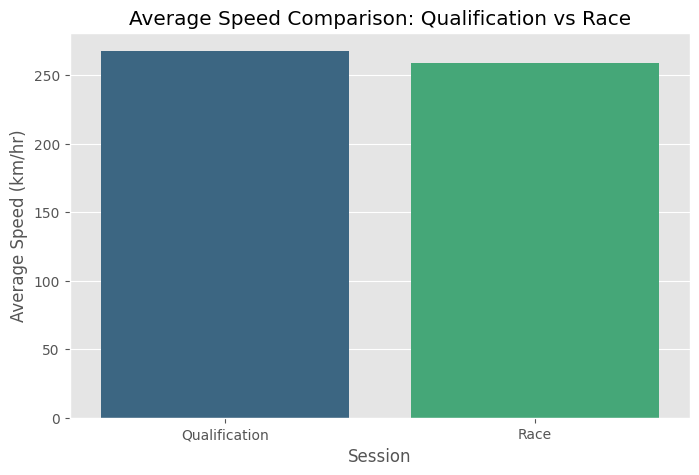

In [29]:
#Average speed comparision 
avg_speed_qualification = qualLaps['SpeedFL'].mean()
avg_speed_race = raceLaps['SpeedFL'].mean()

# Creating the dataframe for plotting
df_avg_speed = pd.DataFrame({
    'Session': ['Qualification', 'Race'],
    'Average Speed': [avg_speed_qualification, avg_speed_race]
})

plt.figure(figsize=(8, 5))
sns.barplot(x='Session', y='Average Speed', data=df_avg_speed, palette='viridis')
plt.title('Average Speed Comparison: Qualification vs Race', color='black')
plt.ylabel('Average Speed (km/hr)')
plt.style.use('ggplot')
plt.show()

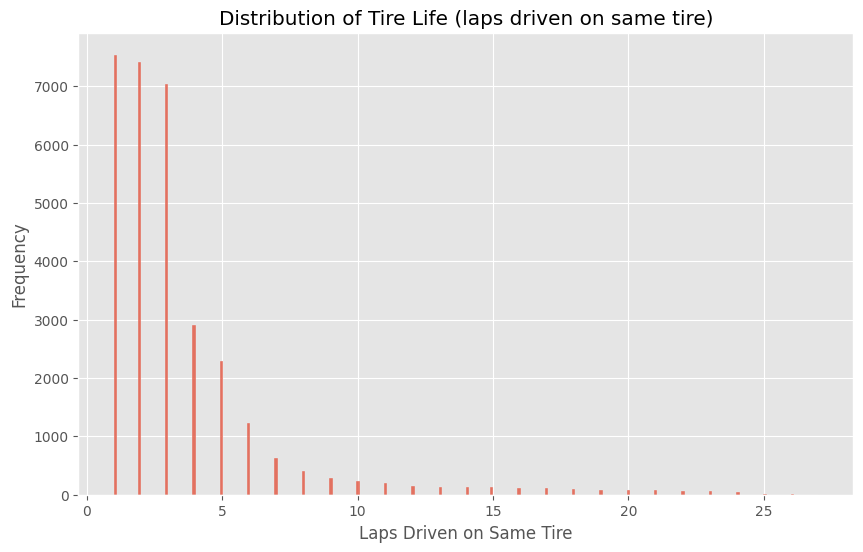

In [9]:
#Distribution of TyreLife
#Tire life is the number of laps a tire has been used continuously 

plt.figure(figsize=(10, 6))
sns.histplot(qualLaps['TyreLife'].dropna(), kde=False)
plt.title('Distribution of Tire Life (laps driven on same tire)', color='black')
plt.xlabel('Laps Driven on Same Tire')
plt.ylabel('Frequency')
plt.style.use('ggplot')

plt.show()


In [10]:
print(qualLaps['Team'].nunique())
print(qualLaps['raceId'].nunique())

16
103


In [11]:
#Total Amount of Pit Stops
# I'm calculating pit stop count using the total number of stints a driver has. 
# Drivers start with 1 stint when they drive out to start the race. max() shows the total stints a driver had in a race
pit_stops = qualLaps.groupby(['Driver', 'raceId'])['Stint'].max().reset_index()
pit_stops['Stint'] = pit_stops['Stint'] - 1 
total_pit_stops = pit_stops['Stint'].sum()

print(f"Total Pit Stops: {total_pit_stops}")

Total Pit Stops: 6440.0


In [12]:
pit_stops.sort_values('Driver', ascending=False)

,Driver,raceId,Stint
2050,ZHO,2022r9q,5.0
2039,ZHO,2022r1q,3.0
2029,ZHO,2022r10q,2.0
2030,ZHO,2022r11q,0.0
2031,ZHO,2022r12q,1.0
...,...,...,...
36,ALB,2020r8q,5.0
35,ALB,2020r7q,4.0
34,ALB,2020r6q,5.0
33,ALB,2020r5q,5.0


C:\Users\alec\AppData\Local\Temp\ipykernel_13376\1679375794.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Stint', y='Driver', data=avg_pit_stops_by_driver.sort_values('Stint', ascending=False), ci=None)


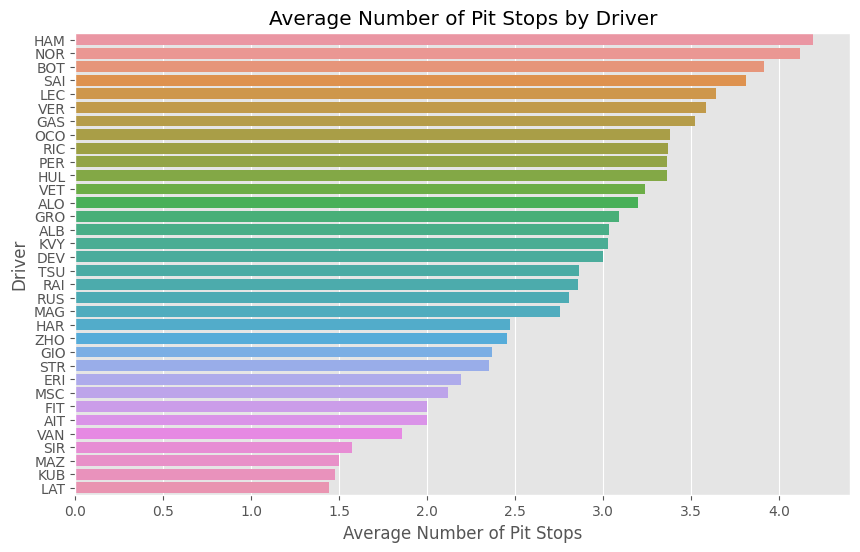

In [13]:
# 2. Average Pit Stops by Drivers

avg_pit_stops_by_driver = pit_stops.groupby('Driver')['Stint'].mean().reset_index()


plt.figure(figsize=(10, 6))
sns.barplot(x='Stint', y='Driver', data=avg_pit_stops_by_driver.sort_values('Stint', ascending=False), ci=None)
plt.title('Average Number of Pit Stops by Driver', color='black')
plt.xlabel('Average Number of Pit Stops')
plt.ylabel('Driver')
plt.style.use('ggplot')

plt.show()

C:\Users\alec\AppData\Local\Temp\ipykernel_13376\2529012312.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Stint', y='Team', data=avg_pit_stops_by_team.sort_values('Stint', ascending=False), ci=None)


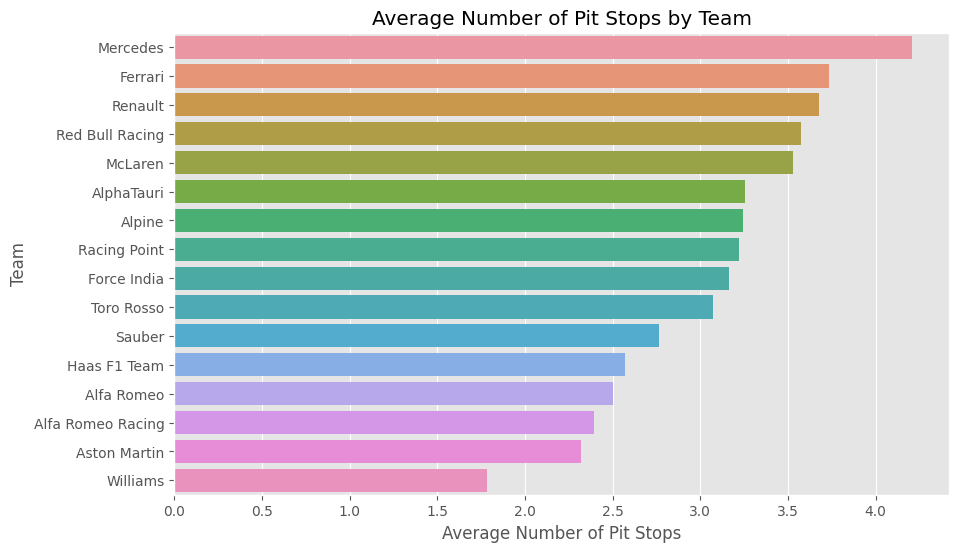

In [14]:
# 3. Average Pit Stops by Teams
pit_stops_with_team = pit_stops.merge(qualLaps[['Driver', 'raceId', 'Team']], on=['Driver', 'raceId'], how='left').drop_duplicates()
avg_pit_stops_by_team = pit_stops_with_team.groupby('Team')['Stint'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Stint', y='Team', data=avg_pit_stops_by_team.sort_values('Stint', ascending=False), ci=None)
plt.title('Average Number of Pit Stops by Team',color='black')
plt.xlabel('Average Number of Pit Stops')
plt.ylabel('Team')
plt.style.use('ggplot')

plt.show()

## Qualification and Race Results

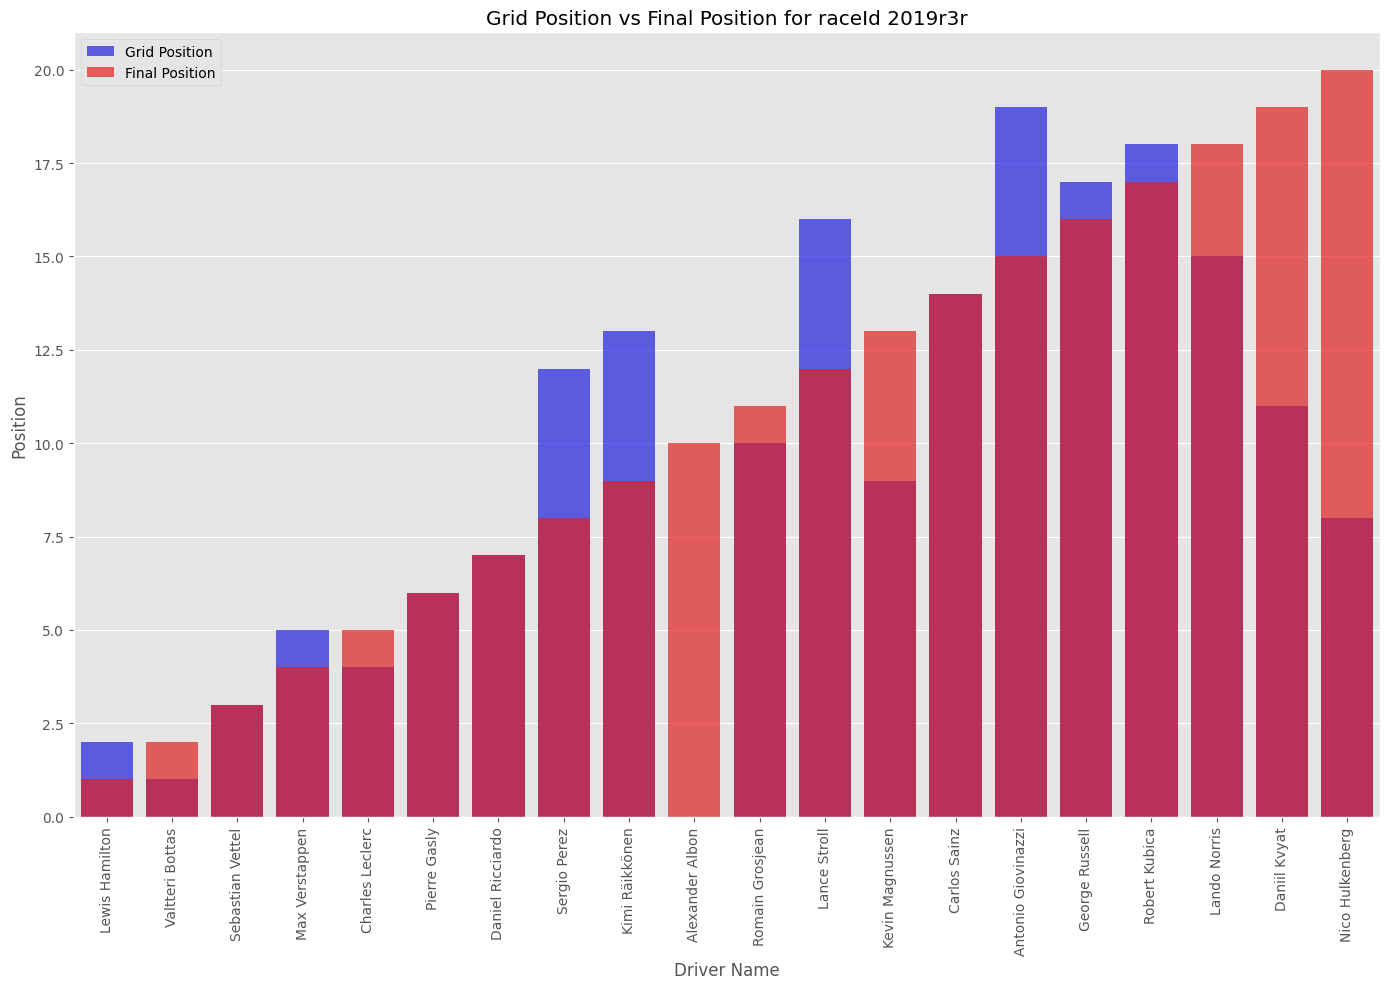

In [15]:
#final position under grid position = overperformance comapred to grid position

race = '2019r3r'
race_data = raceResults[raceResults['raceId'] == race]
race_data = race_data.sort_values(by='Position')

plt.figure(figsize=(14, 10))
sns.barplot(x='FullName', y='GridPosition', data=race_data, color='blue', label='Grid Position', alpha=0.7, order=race_data['FullName'], ax=plt.gca())

sns.barplot(x='FullName', y='Position', data=race_data, color='red', label='Final Position', alpha=0.7, order=race_data['FullName'], ax=plt.gca())
plt.title(f'Grid Position vs Final Position for raceId {race}', color='black')
plt.ylabel('Position')
plt.xlabel('Driver Name')
plt.xticks(rotation=90) 
plt.legend()
plt.tight_layout()
plt.style.use('ggplot')

plt.show()


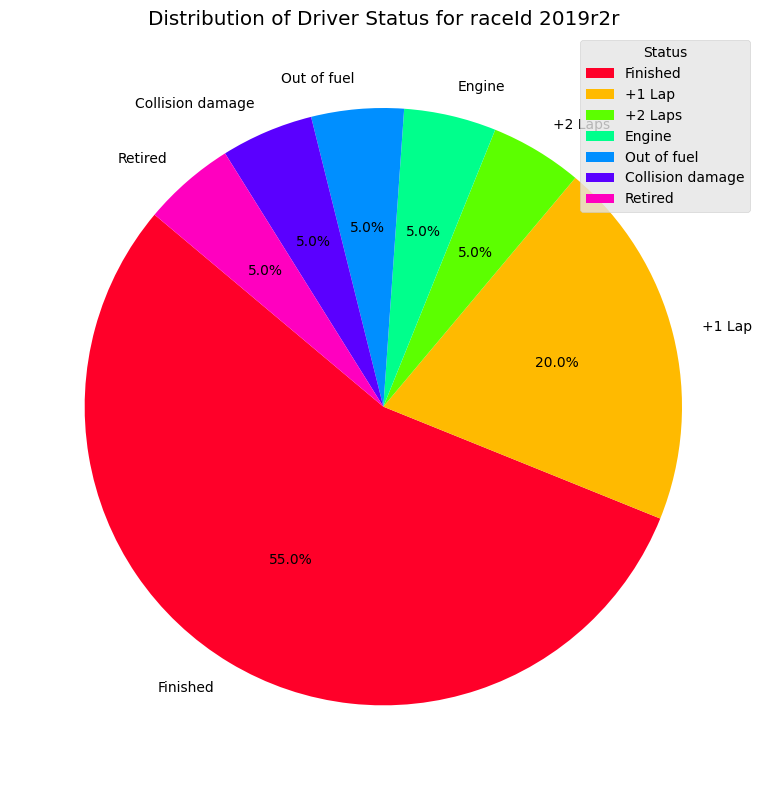

In [16]:
#Driver status for a specific race

race_data = raceResults[raceResults['raceId'] == '2019r2r']
status_counts = race_data['Status'].value_counts()

plt.figure(figsize=(10, 8))
colors = plt.cm.gist_rainbow(np.linspace(0, 1, len(status_counts)))  # Assigns different colors

status_counts.plot.pie(colors=colors, autopct=lambda p: '{:.1f}%'.format(p), startangle=140)
plt.title('Distribution of Driver Status for raceId 2019r2r', color='black')
legend = plt.legend(title="Status", loc="best", frameon=True)
plt.setp(legend.get_texts(), color='black')
plt.setp(legend.get_title(), color='black')
plt.ylabel('') 
plt.tight_layout()

plt.style.use('ggplot')
for text in plt.gca().texts:
    text.set_color("black")

plt.show()


## Qualifying and Race Weather

In [17]:
qualification_race_weather = qualWeather[qualWeather['raceId'] == '2018r1q']
qualification_race_weather

,Time,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed,raceId
0,0 days 00:00:49.141000,24.7,58.8,1007.9,False,32.0,307,1.3,2018r1q
1,0 days 00:01:49.222000,24.7,58.8,1007.9,False,31.9,305,1.9,2018r1q
2,0 days 00:02:49.270000,24.8,58.9,1007.9,False,31.9,279,2.1,2018r1q
3,0 days 00:03:49.300000,24.7,58.9,1007.9,False,31.9,297,0.8,2018r1q
4,0 days 00:04:49.303000,24.6,59.3,1007.9,False,31.6,293,1.5,2018r1q
...,...,...,...,...,...,...,...,...,...
73,0 days 01:13:51.003000,24.4,63.2,1007.9,False,28.9,252,0.5,2018r1q
74,0 days 01:14:50.151000,24.3,63.1,1007.9,False,28.8,166,0.7,2018r1q
75,0 days 01:15:50.329000,24.3,63.4,1007.9,False,28.9,4,0.3,2018r1q
76,0 days 01:16:50.182000,24.3,63.5,1007.9,False,29.0,265,0.7,2018r1q


In [18]:
#checking weather data directly from fastf1
import fastf1
session = fastf1.get_session(2018, '3', 'Q')
session.load(telemetry=True, laps=True, weather=True)
session.weather_data.tail(10)

req         WARNING 	

DEFAULT CACHE ENABLED!
	Cache directory: C:\Users\alec\AppData\Local\Temp\fastf1.
	Size: 15.1 GB
core           INFO 	Loading data for Australian Grand Prix - Qualifying [v3.1.2]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['44', '7', '5', '33', '3', '20', '8', '27', '55', '77', '14', '2', '11', '18', '31', '28', '9', '16', 

,Time,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed
68,0 days 01:08:50.062000,24.5,63.2,1007.9,False,29.4,229,0.0
69,0 days 01:09:50.077000,24.6,62.8,1007.9,False,29.7,200,0.5
70,0 days 01:10:50.095000,24.6,62.6,1007.9,False,29.4,219,0.7
71,0 days 01:11:50.276000,24.6,62.3,1007.9,False,29.3,237,0.9
72,0 days 01:12:50.123000,24.5,62.5,1007.9,False,29.2,266,0.7
73,0 days 01:13:51.003000,24.4,63.2,1007.9,False,28.9,252,0.5
74,0 days 01:14:50.151000,24.3,63.1,1007.9,False,28.8,166,0.7
75,0 days 01:15:50.329000,24.3,63.4,1007.9,False,28.9,4,0.3
76,0 days 01:16:50.182000,24.3,63.5,1007.9,False,29.0,265,0.7
77,0 days 01:17:50.198000,24.2,63.4,1007.9,False,29.1,356,0.8


In [19]:
#Aggregated Weather
qualWeatherGrouped = qualWeather.groupby('raceId').mean().reset_index()
raceWeatherGrouped = raceWeather.groupby('raceId').mean().reset_index()

C:\Users\alec\AppData\Local\Temp\ipykernel_13376\499765356.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  qualWeatherGrouped = qualWeather.groupby('raceId').mean().reset_index()
C:\Users\alec\AppData\Local\Temp\ipykernel_13376\499765356.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  raceWeatherGrouped = raceWeather.groupby('raceId').mean().reset_index()


## Merging Dataframes

### Merging 3rd Qualifying Round Tables

In [20]:
qualMergedDf = pd.merge(qualLaps, qualResults, on=['raceId', 'DriverNumber'], how='left', suffixes=('', '_results'))

# Merge with qualStatus
qualMergedDf = pd.merge(qualMergedDf, qualStatus, on=['raceId'], how='left', suffixes=('', '_status'))

# Merge with qualTrackStatus
qualMergedDf = pd.merge(qualMergedDf, qualTrackStatus, on=['raceId'], how='left', suffixes=('', '_trackstatus'))

# Merge with qualWeatherGrouped
qualMergedDf = pd.merge(qualMergedDf, qualWeatherGrouped, on=['raceId'], how='left', suffixes=('', '_weather'))

qualMergedDf.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2559891 entries, 0 to 2559890
Data columns (total 64 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Time                object 
 1   Driver              object 
 2   DriverNumber        int64  
 3   LapTime             object 
 4   LapNumber           float64
 5   Stint               float64
 6   PitOutTime          object 
 7   PitInTime           object 
 8   Sector1Time         object 
 9   Sector2Time         object 
 10  Sector3Time         object 
 11  Sector1SessionTime  object 
 12  Sector2SessionTime  object 
 13  Sector3SessionTime  object 
 14  SpeedI1             float64
 15  SpeedI2             float64
 16  SpeedFL             float64
 17  SpeedST             float64
 18  IsPersonalBest      object 
 19  Compound            object 
 20  TyreLife            float64
 21  FreshTyre           bool   
 22  Team                object 
 23  LapStartTime        object 
 24  LapStartDate        obje

### Merging Final Race Tables

In [21]:
raceMerged_df = pd.merge(raceLaps, raceResults, on=['raceId', 'DriverNumber'], how='left', suffixes=('', '_results'))

# Merge with raceStatus
raceMerged_df = pd.merge(raceMerged_df, raceStatus, on=['raceId'], how='left', suffixes=('', '_status'))

# Merge with raceTrackStatus
raceMerged_df = pd.merge(raceMerged_df, raceTrackStatus, on=['raceId'], how='left', suffixes=('', '_trackstatus'))

# Merge with raceWeather
raceMerged_df = pd.merge(raceMerged_df, raceWeatherGrouped, on=['raceId'], how='left', suffixes=('', '_weather'))

raceMerged_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7042838 entries, 0 to 7042837
Data columns (total 64 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Time                object 
 1   Driver              object 
 2   DriverNumber        int64  
 3   LapTime             object 
 4   LapNumber           float64
 5   Stint               float64
 6   PitOutTime          object 
 7   PitInTime           object 
 8   Sector1Time         object 
 9   Sector2Time         object 
 10  Sector3Time         object 
 11  Sector1SessionTime  object 
 12  Sector2SessionTime  object 
 13  Sector3SessionTime  object 
 14  SpeedI1             float64
 15  SpeedI2             float64
 16  SpeedFL             float64
 17  SpeedST             float64
 18  IsPersonalBest      object 
 19  Compound            object 
 20  TyreLife            float64
 21  FreshTyre           bool   
 22  Team                object 
 23  LapStartTime        object 
 24  LapStartDate        obje

### Creating Podium Feature (Top 3 in Final Race)

In [22]:
raceMerged_df['Podium'] = raceMerged_df['Position_results'].apply(lambda x: 1 if x in [1, 2, 3] else 0)

In [23]:
podium_df = raceMerged_df[raceMerged_df['Position_results'].isin([1, 2, 3])]
podium_df = podium_df.drop_duplicates(subset=['DriverNumber', 'raceId'])

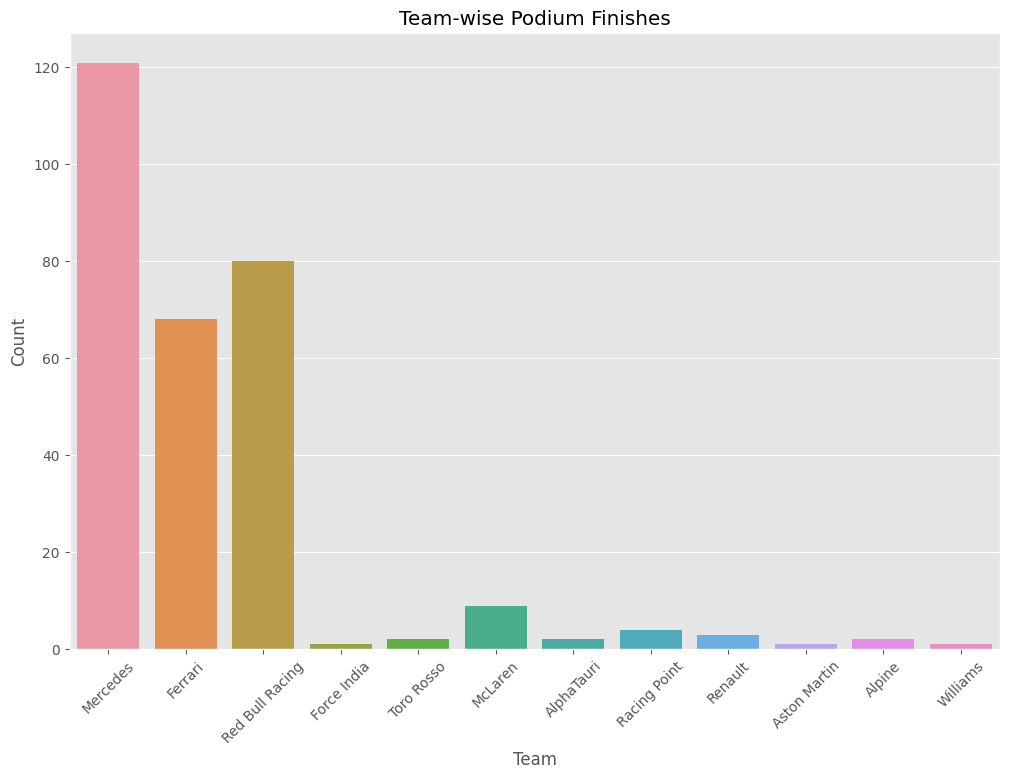

In [24]:
# Team-wise Podium Finishes
plt.figure(figsize=(12, 8))
sns.countplot(data=podium_df, x='Team')
plt.title('Team-wise Podium Finishes')
plt.xlabel('Team')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

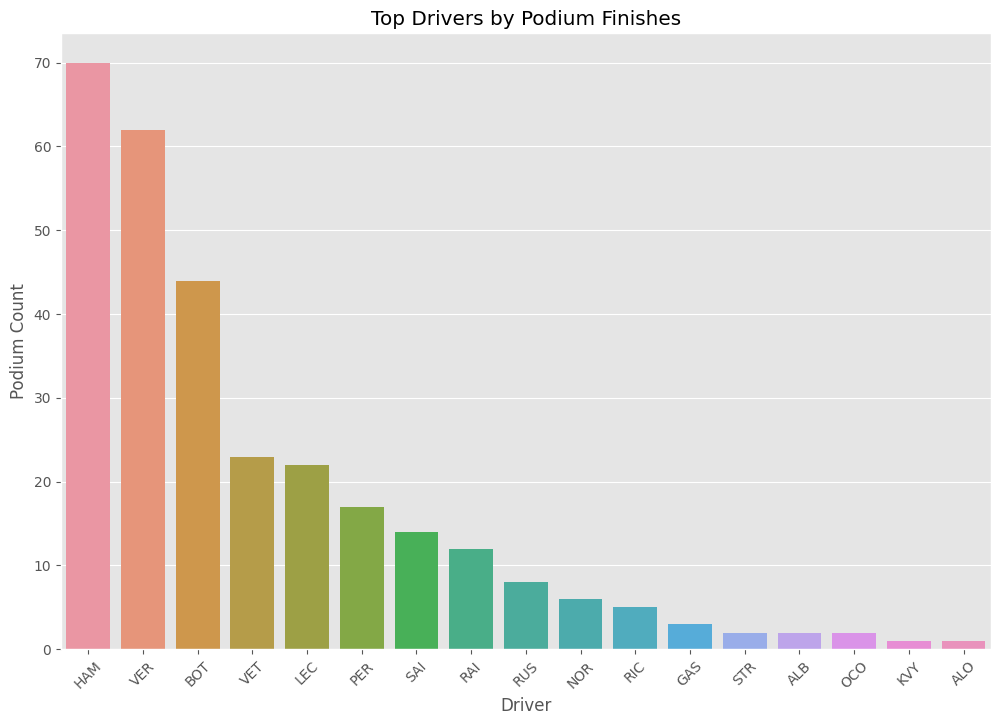

In [28]:
# Number of Podium Finishes by Driver
driver_podium_counts = podium_df['Driver'].value_counts().reset_index()
driver_podium_counts.columns = ['Driver', 'PodiumCount']

top_drivers = driver_podium_counts.sort_values(by='PodiumCount', ascending=False).head(20)

plt.figure(figsize=(12, 8))
sns.barplot(data=top_drivers, x='Driver', y='PodiumCount')
plt.title('Top Drivers by Podium Finishes')
plt.xlabel('Driver')
plt.ylabel('Podium Count')
plt.xticks(rotation=45)
plt.show()
